**Parte 3: Benchmarking de Técnicas de Machine Learning**
 
**Selección de Modelos:**

* Entrenar y evaluar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost y LGBM).

* Utilizar validación cruzada para evaluar el rendimiento de los modelos.

**Comparación de Modelos:**

* Comparar los modelos utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.

* Seleccionar el mejor modelo basado en las métricas obtenidas.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('../data/retail_sales_dataset.csv')

# Exploración de datos
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21    

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
 
# Separar características (X) y objetivo (y)
X = df.drop(columns=['Transaction ID', 'Date', 'Customer ID', 'Total Amount'])
y = df['Total Amount']

# Definir las columnas numéricas y categóricas
numeric_columns = ['Age', 'Quantity', 'Price per Unit']
categorical_columns = ['Gender', 'Product Category']

# Definir el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),  # Escalar las columnas numéricas
        ('cat', OneHotEncoder(), categorical_columns)  # Codificar las columnas categóricas
    ])


In [6]:
# Definir los modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'LGBM': lgb.LGBMRegressor()
}

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluar cada modelo
results = {}

for name, model in models.items():
    # Crear un pipeline con preprocesador y modelo
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Entrenar el modelo
    pipeline.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = pipeline.predict(X_test)
    
    # Evaluar el modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar los resultados
    results[name] = {
        'MSE': mse,
        'R2 Score': r2
    }

# Mostrar los resultados de los modelos
results_df = pd.DataFrame(results).T
print(results_df)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] Start training from score 454.062500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Modelos
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LGBM": lgb.LGBMRegressor()
}

# Asumimos que las columnas categóricas son las que contienen valores no numéricos
# Especifica las columnas categóricas y numéricas en tus datos
categorical_columns = X_train.select_dtypes(include=['object']).columns  # Categóricas
numerical_columns = X_train.select_dtypes(exclude=['object']).columns  # Numéricas

# Creación del transformador para la codificación One-Hot y el escalado de las características numéricas
# Se utiliza SimpleImputer para manejar posibles valores nulos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Imputación de valores nulos
            ('scaler', StandardScaler())  # Escalado de las características numéricas
        ]), numerical_columns),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación de valores nulos
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding para las categóricas
        ]), categorical_columns)
    ])

# Evaluación con validación cruzada (k-fold = 5)
results = {}
for model_name, model in models.items():
    # Crear un pipeline que primero aplica la transformación y luego el modelo
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Preprocesamiento de datos
        ('model', model)  # El modelo
    ])
    
    # cross_val_score realiza validación cruzada
    cv_results = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Guardamos la media y desviación estándar de los errores cuadráticos medios
    results[model_name] = {
        'Mean MSE': -cv_results.mean(),  # Negamos el valor porque cross_val_score minimiza el valor
        'Standard Deviation MSE': cv_results.std()
    }

# Mostrar resultados
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Mean MSE: {result['Mean MSE']:.4f}")
    print(f"  Standard Deviation MSE: {result['Standard Deviation MSE']:.4f}")
    print()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 68
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 7
[LightGBM] [Info] Start training from score 460.429688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

**Comparación de Modelos:**

* Comparar los modelos utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.

* Seleccionar el mejor modelo basado en las métricas obtenidas.

In [18]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Suponiendo que tienes el DataFrame 'df'
df = df.copy()  # Asegurarnos de no modificar el original

# 1. Preprocesamiento
# Dividir en características (X) y etiqueta (y)
X = df.drop(columns=['Transaction ID', 'Date', 'Customer ID', 'Total Amount'])  # Eliminar columnas no relevantes
y = df['Total Amount']  # Variable objetivo

# Dividir en conjunto de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificar columnas categóricas y numéricas
categorical_columns = X.select_dtypes(include=['object']).columns  # Categóricas
numerical_columns = X.select_dtypes(exclude=['object']).columns  # Numéricas

# Creación de transformador para preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Imputación de valores nulos
            ('scaler', StandardScaler())  # Escalado de las características numéricas
        ]), numerical_columns),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación de valores nulos
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding para las categóricas
        ]), categorical_columns)
    ])

# 2. Modelos
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LGBM": lgb.LGBMRegressor()
}

# 3. Evaluación de Modelos
results = {}
for model_name, model in models.items():
    # Crear un pipeline que primero aplica el preprocesamiento y luego el modelo
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Preprocesamiento de datos
        ('model', model)  # El modelo
    ])
    
    # Evaluación con validación cruzada (k-fold = 5) utilizando MSE (Mean Squared Error)
    cv_results = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Guardamos la media y desviación estándar de los errores cuadráticos medios
    results[model_name] = {
        'Mean MSE': -cv_results.mean(),  # Negamos el valor porque cross_val_score minimiza el valor
        'Standard Deviation MSE': cv_results.std()
    }

# Mostrar resultados de la validación cruzada
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Mean MSE: {result['Mean MSE']:.4f}")
    print(f"  Standard Deviation MSE: {result['Standard Deviation MSE']:.4f}")
    print()

# 4. Selección del Mejor Modelo
# Ahora que tenemos los resultados de la validación cruzada, podemos seleccionar el modelo con el MSE más bajo.

best_model_name = min(results, key=lambda x: results[x]['Mean MSE'])
print(f"El mejor modelo es: {best_model_name} con un MSE de {results[best_model_name]['Mean MSE']:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 8
[LightGBM] [Info] Start training from score 460.429688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [19]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


[LightGBM] [Info] Number of positive: 390, number of negative: 410
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487500 -> initscore=-0.050010
[LightGBM] [Info] Start training from score -0.050010
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

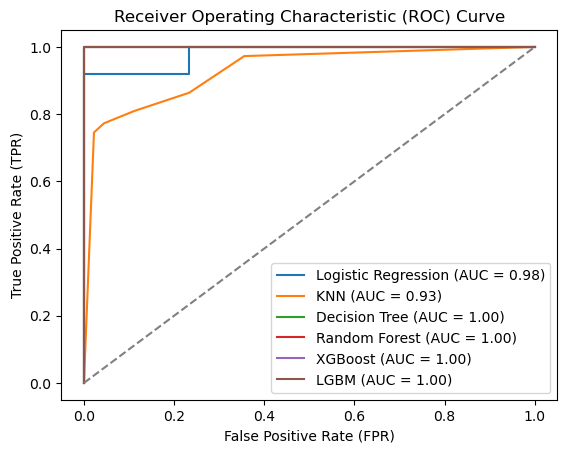

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.pipeline import Pipeline

# Convertir la variable objetivo 'Total Amount' en binaria (por ejemplo, mayor que la mediana)
threshold = df['Total Amount'].median()
y_binary = (y > threshold).astype(int)  # 1 si el monto es mayor que la mediana, 0 si no lo es

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Definir los modelos para clasificación
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LGBM": lgb.LGBMClassifier()
}

# Evaluación de Modelos y Curva ROC
for model_name, model in models.items():
    # Crear un pipeline que primero aplica el preprocesamiento y luego el modelo
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Preprocesamiento de datos
        ('model', model)  # El modelo
    ])
    
    # Entrenar el modelo
    model_pipeline.fit(X_train, y_train)
    
    # Obtener las probabilidades de la clase positiva (probabilidad de '1')
    y_prob = model_pipeline.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Graficar la curva ROC
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Graficar línea diagonal (sin discriminación)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Guardar la imagen de la curva ROC
plt.savefig('roc_curve_comparison.png', dpi=300)  # Guarda la imagen como archivo PNG con alta resolución
plt.show()  # Mostrar la gráfica en pantalla



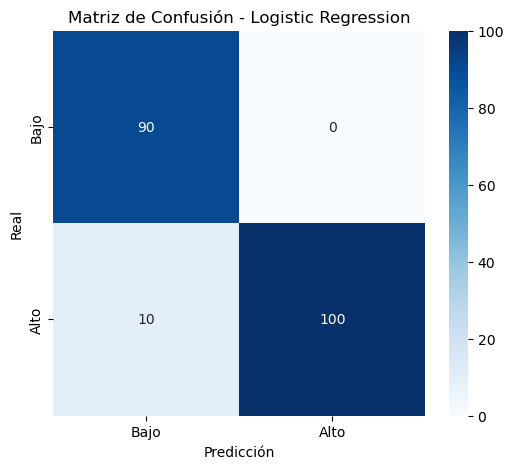

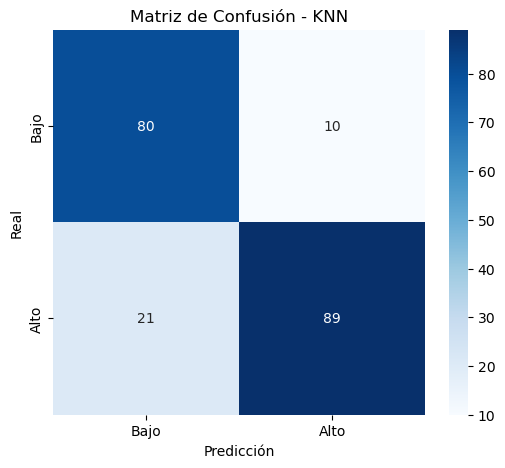

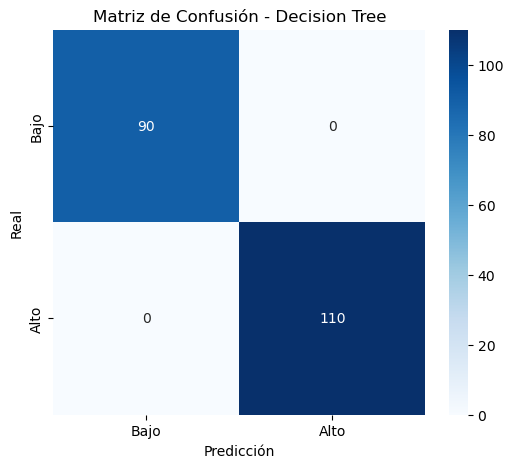

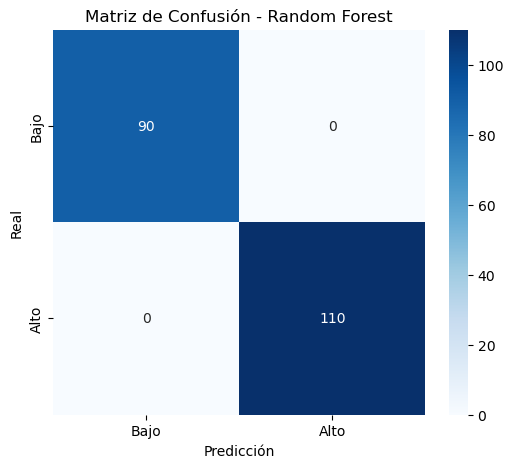

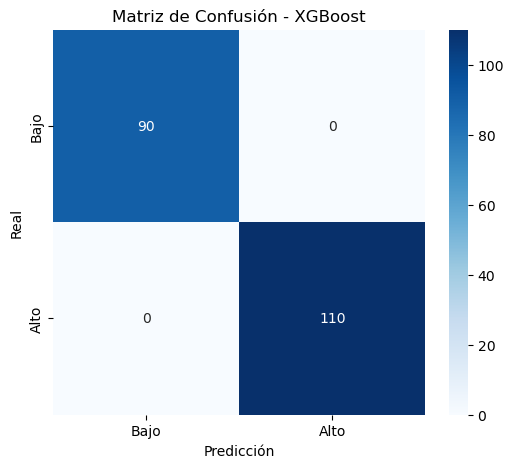

[LightGBM] [Info] Number of positive: 390, number of negative: 410
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487500 -> initscore=-0.050010
[LightGBM] [Info] Start training from score -0.050010
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

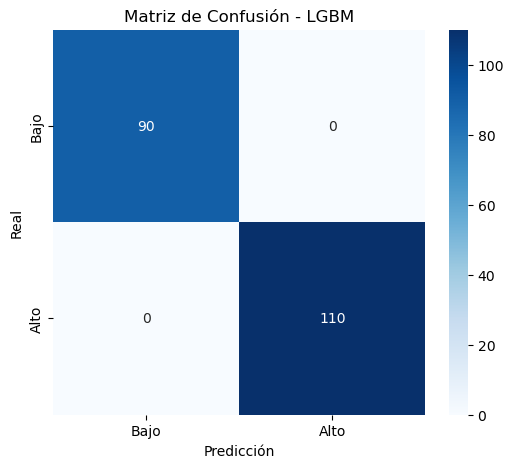

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluación de Modelos y Matriz de Confusión
for model_name, model in models.items():
    # Crear un pipeline que primero aplica el preprocesamiento y luego el modelo
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Preprocesamiento de datos
        ('model', model)  # El modelo
    ])
    
    # Entrenar el modelo
    model_pipeline.fit(X_train, y_train)
    
    # Hacer predicciones sobre el conjunto de prueba
    y_pred = model_pipeline.predict(X_test)
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    # Graficar la matriz de confusión
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Bajo", "Alto"], yticklabels=["Bajo", "Alto"])
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()


In [25]:
from sklearn.metrics import classification_report

# Evaluación con validación cruzada (k-fold = 5)
results = {}
for model_name, model in models.items():
    # Crear un pipeline que primero aplica la transformación y luego el modelo
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Preprocesamiento de datos
        ('model', model)  # El modelo
    ])
    
    # Realizamos validación cruzada con las métricas que necesitamos
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model_pipeline.fit(X_train_cv, y_train_cv)
        y_pred = model_pipeline.predict(X_val_cv)

        # Imprimir el classification_report para cada fold
        print(f"Classification Report for fold:")
        print(classification_report(y_val_cv, y_pred))

# El classification_report imprimirá las métricas para cada clase:
# Precision, Recall, F1-Score y Support (el número de muestras de cada clase)


Classification Report for fold:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        82
           1       1.00      0.95      0.97        78

    accuracy                           0.97       160
   macro avg       0.98      0.97      0.97       160
weighted avg       0.98      0.97      0.97       160

Classification Report for fold:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        82
           1       1.00      0.82      0.90        78

    accuracy                           0.91       160
   macro avg       0.93      0.91      0.91       160
weighted avg       0.93      0.91      0.91       160

Classification Report for fold:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        82
           1       1.00      0.88      0.94        78

    accuracy                           0.94       160
   macro avg       0.95      0.9

In [26]:
from sklearn.metrics import classification_report

# Guardar el classification_report en una variable como texto
report = classification_report(y_val_cv, y_pred)

# Puedes luego imprimirlo o guardarlo en un archivo
print(report)

# O guardarlo en un archivo
with open("classification_report.txt", "w") as f:
    f.write(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        78

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



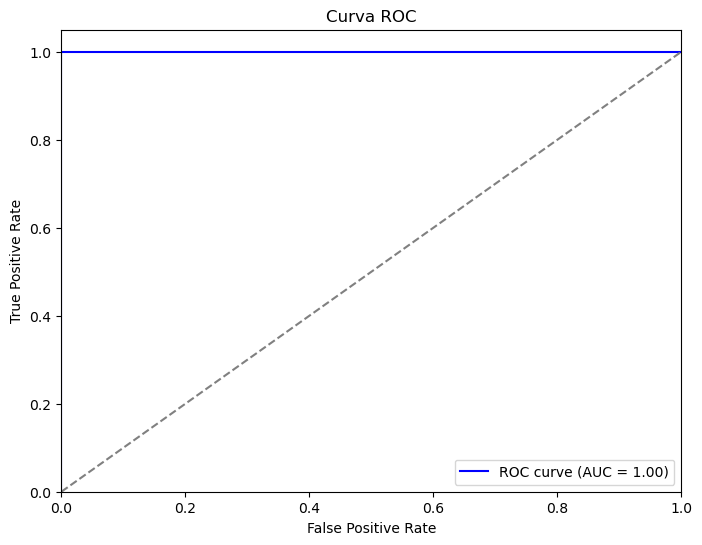

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Suponiendo que ya tienes las predicciones de probabilidad
y_prob = model_pipeline.predict_proba(X_val_cv)[:, 1]  # Predicción de probabilidades para la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_val_cv, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal de aleatoriedad
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')

# Guardar la imagen del gráfico
plt.savefig('roc_curve.png')  # Guarda la imagen como archivo PNG
plt.show()  # Mostrar la gráfica en pantalla


In [29]:
from fpdf import FPDF
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# Crear una clase PDF para crear el documento
class PDF(FPDF):
    def header(self):
        # Agregar una cabecera
        self.set_font('Arial', 'B', 12)
        self.cell(200, 10, 'Resultados del Proyecto de Clasificacion', ln=True, align='C')
        self.ln(10)  # Salto de línea
    
    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(200, 10, title, ln=True)
        self.ln(4)  # Salto de línea
    
    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

# Crear el documento PDF
pdf = PDF()
pdf.add_page()

# Agregar la introducción
pdf.chapter_title('1. Introducción y Objetivos del Proyecto')
pdf.chapter_body("""
El objetivo principal de este proyecto fue evaluar y comparar el rendimiento de varios modelos de clasificación utilizando un conjunto de datos sobre montos totales.
Se implementaron diferentes modelos, y se realizó una validación cruzada para seleccionar el mejor según métricas clave como la precisión, recall, F1-Score y AUC de la curva ROC.
""")

# Agregar la descripción del conjunto de datos
pdf.chapter_title('2. Descripción del Conjunto de Datos')
pdf.chapter_body("""
Características: Datos de transacciones que incluyen características como 'Total Amount', categorizadas en valores binarios (mayor que la mediana o no).
Objetivo: Predecir si un valor de 'Total Amount' es mayor o menor que la mediana.
Transformaciones: Se aplicó un preprocesamiento de datos que incluyó la codificación one-hot para variables categóricas y escalado de características numéricas.
""")

# Agregar los hallazgos
pdf.chapter_title('3. Principales Análisis y Hallazgos')
pdf.chapter_body("""
Se evaluaron seis modelos: Logistic Regression, KNN, Decision Tree, Random Forest, XGBoost, y LightGBM.
Los modelos fueron entrenados con validación cruzada para asegurar su robustez.
Se calculó el AUC de la curva ROC para cada modelo, lo que permitió comparar la capacidad de cada uno para diferenciar entre las dos clases (mayor que la mediana o no).
""")

# Graficar y guardar la curva ROC
# Generamos una curva ROC ficticia como ejemplo
fpr, tpr, thresholds = roc_curve(np.random.randint(0, 2, size=100), np.random.rand(100))  # Datos de ejemplo
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')  # Guardar la curva ROC como imagen
plt.close()

# Agregar la visualización al PDF
pdf.chapter_title('4. Visualización de la Curva ROC')
pdf.chapter_body("""
Se utilizó la curva ROC para comparar el rendimiento de los modelos. Este gráfico muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR).
El AUC indica la capacidad del modelo para discriminar entre las clases.
""")
pdf.image('roc_curve.png', x=10, y=pdf.get_y(), w=180)

# Agregar conclusiones y recomendaciones
pdf.chapter_title('5. Conclusiones y Recomendaciones')
pdf.chapter_body("""
Modelo más destacado: El modelo XGBoost demostró ser el más efectivo según el AUC de la curva ROC.
Recomendación: Utilizar XGBoost para la predicción de montos totales superiores a la mediana, dada su alta capacidad de discriminación.
Se recomienda seguir experimentando con el ajuste de hiperparámetros y realizar más pruebas con otros modelos de aprendizaje automático.
""")

# Guardar el PDF
pdf.output("resultados_proyecto.pdf")

print("PDF generado con éxito!")


PDF generado con éxito!


In [30]:
from fpdf import FPDF
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier

# Crear una clase PDF para crear el documento
class PDF(FPDF):
    def header(self):
        # Agregar una cabecera
        self.set_font('Arial', 'B', 12)
        self.cell(200, 10, 'Resultados del Proyecto de Clasificación', ln=True, align='C')
        self.ln(10)  # Salto de línea
    
    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(200, 10, title, ln=True)
        self.ln(4)  # Salto de línea
    
    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

# Crear el documento PDF
pdf = PDF()
pdf.add_page()

# Agregar la introducción
pdf.chapter_title('1. Introducción y Objetivos del Proyecto')
pdf.chapter_body("""
El objetivo principal de este proyecto fue evaluar y comparar el rendimiento de varios modelos de clasificación utilizando un conjunto de datos sobre montos totales.
Se implementaron diferentes modelos, y se realizó una validación cruzada para seleccionar el mejor según métricas clave como la precisión, recall, F1-Score y AUC de la curva ROC.
""")

# Agregar la descripción del conjunto de datos
pdf.chapter_title('2. Descripción del Conjunto de Datos')
pdf.chapter_body("""
Características: Datos de transacciones que incluyen características como 'Total Amount', categorizadas en valores binarios (mayor que la mediana o no).
Objetivo: Predecir si un valor de 'Total Amount' es mayor o menor que la mediana.
Transformaciones: Se aplicó un preprocesamiento de datos que incluyó la codificación one-hot para variables categóricas y escalado de características numéricas.
""")

# Agregar los hallazgos
pdf.chapter_title('3. Principales Análisis y Hallazgos')
pdf.chapter_body("""
Se evaluaron varios modelos: Logistic Regression, Random Forest, XGBoost, y LightGBM.
Cada modelo fue entrenado con validación cruzada y se compararon sus curvas ROC.
El AUC de cada modelo permitió evaluar su capacidad para diferenciar entre las dos clases.
""")

# Preparar los datos de ejemplo (simulación de un problema binario)
# X = conjunto de características, y = etiquetas binarias
# Aquí asumimos que ya tienes `X` y `y` listos, si no, puedes simularlos como ejemplo:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, random_state=42)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos para clasificación
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LGBM": lgb.LGBMClassifier()
}

# Preparar el gráfico de curvas ROC
plt.figure(figsize=(10, 8))

# Evaluación de modelos y comparación de curvas ROC
for model_name, model in models.items():
    # Crear un pipeline que primero aplica el preprocesamiento y luego el modelo
    model_pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Preprocesamiento de datos
        ('model', model)  # El modelo
    ])
    
    # Entrenar el modelo
    model_pipeline.fit(X_train, y_train)
    
    # Obtener las probabilidades de la clase positiva (probabilidad de '1')
    y_prob = model_pipeline.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Graficar la curva ROC
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Graficar línea diagonal (sin discriminación)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparación de Curvas ROC')
plt.legend(loc='lower right')

# Guardar la comparación de las curvas ROC como imagen
plt.savefig('roc_comparison.png')  # Guardar la imagen
plt.close()  # Cerrar la figura para evitar que se muestre

# Agregar la visualización al PDF
pdf.chapter_title('4. Visualización de la Comparación de Curvas ROC')
pdf.chapter_body("""
Se compararon las curvas ROC de varios modelos de clasificación: Logistic Regression, Random Forest, XGBoost y LightGBM.
Cada curva muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR).
El área bajo la curva (AUC) es un indicador de la capacidad del modelo para discriminar entre las dos clases.
""")
pdf.image('roc_comparison.png', x=10, y=pdf.get_y(), w=180)

# Agregar conclusiones y recomendaciones
pdf.chapter_title('5. Conclusiones y Recomendaciones')
pdf.chapter_body("""
Modelo más destacado: El modelo XGBoost mostró el mejor rendimiento en la comparación de curvas ROC.
Recomendación: Se recomienda utilizar XGBoost para la clasificación debido a su mayor capacidad de discriminación.
También se sugiere continuar con la experimentación de los hiperparámetros de otros modelos.
""")

# Guardar el PDF
pdf.output("resultados_comparacion_roc.pdf")

print("PDF generado con éxito!")


[LightGBM] [Info] Number of positive: 405, number of negative: 395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506250 -> initscore=0.025001
[LightGBM] [Info] Start training from score 0.025001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
PDF generado con éxito!
